In [1]:
from help_funcs import * 
# from eofs.xarray import Eof
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import importlib
import xarray as xr
import seaborn as sns
import pandas as pd
import cmocean.cm as cm
import netCDF4 as nc
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
import gsw
import gc
from multiprocessing import Pool
import os 
import multiprocessing
from os.path import exists
sns.set_context("notebook")
import dask_labextension

array([ 2.54540423e-05, -3.88036729e-03,  3.14344614e-03,  9.07949236e-03,
        3.38740416e-03, -4.55389663e-04,  9.44482829e-03,  1.61114783e-03,
        3.68778448e-03,  1.00832088e-02,  1.60013659e-02, -6.55175783e-03,
       -5.82163599e-03, -1.83929894e-02,  4.33432823e-03, -2.02525914e-02,
        3.85285773e-03, -3.12696737e-03,  1.48518333e-02, -6.17747497e-03,
       -8.34426214e-03, -5.86828047e-03,  1.00104537e-02,  5.77555681e-03,
       -5.03668052e-03,  1.15556575e-02,  1.05850563e-02, -6.14496892e-03,
       -3.57565265e-03, -1.97295161e-03, -1.59319309e-03,  8.69388064e-03,
       -1.92652276e-02,  2.21584425e-02, -1.39395799e-03,  1.74684112e-03,
        5.12213821e-04,  7.32513684e-03,  1.40319439e-03, -8.55160370e-03,
       -6.63533029e-03,  5.25890155e-03,  1.24823777e-02,  9.54533510e-03,
        3.79188926e-03, -1.04479462e-02, -2.30519752e-02, -8.96771704e-03,
        5.22175822e-03,  5.60060660e-03, -4.27472753e-03,  1.60548544e-02,
        1.21963946e-02, -

In [143]:
t = np.arange(0, 2*np.pi, 0.1)
row1 = np.sin(t) + 0.5*np.sin(t - np.pi) + (0.1 * np.random.randn(len(t)))
row2 = 0.3*np.sin(t)
x = np.array([row1,row2])

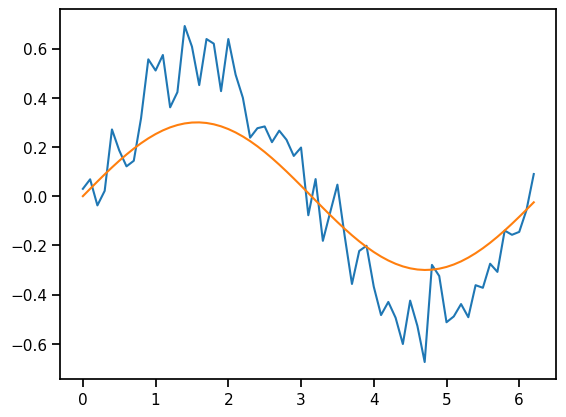

In [144]:
plt.plot(t, row1)
plt.plot(t, row2)

In [145]:
x_mean = np.mean(x, axis= 1)
x_nomean = x - np.expand_dims(x_mean, axis=1) 
Y = x_nomean # Y has dims = (location, time) 
u, s, vh  = linalg.svd(Y, full_matrices= False) #do svd 

Text(0, 0.5, '%')

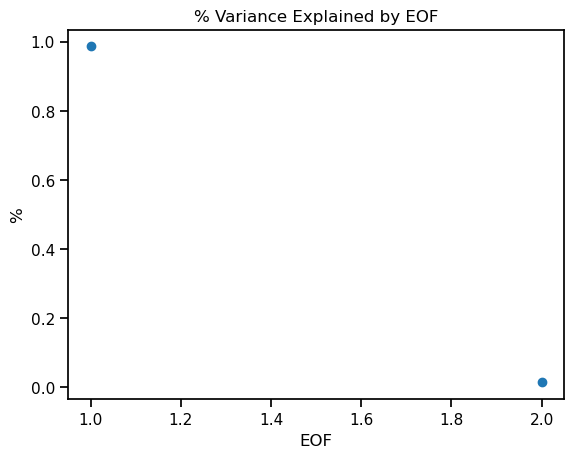

In [146]:
perc_var = [lam**2 / np.sum(s**2) for lam in s[0:11]]
plt.scatter(range(1, len(perc_var)+1), perc_var)
plt.title("% Variance Explained by EOF")
plt.xlabel("EOF")
plt.ylabel("%")

In [147]:
beta = u[:, :].T @ Y #get expansion coefs for first EOF

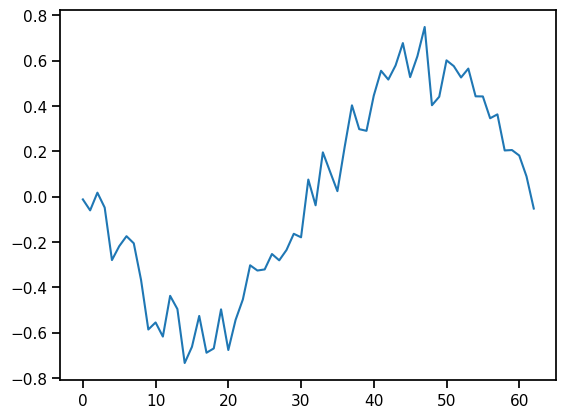

In [148]:
plt.plot(beta[0, :])

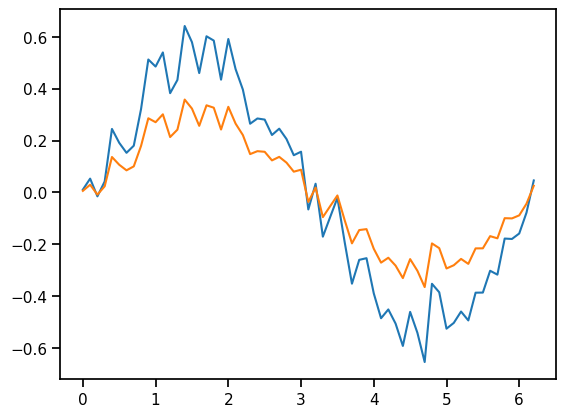

In [164]:
Y_approx = u[:, 0:1] @ beta[0:1, :]
plt.plot(t, Y_approx[0, :])
plt.plot(t, Y_approx[1, :])

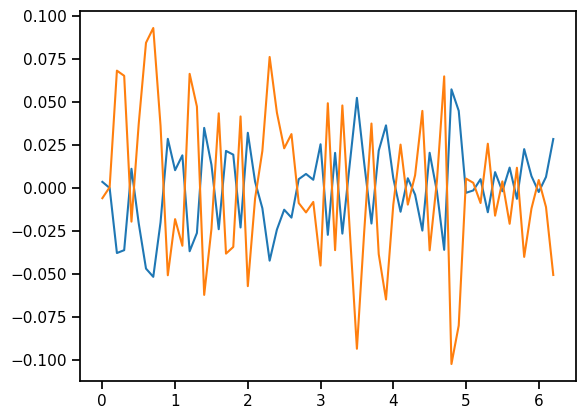

In [165]:
Y_approx2 = u[:, 1:2] @ beta[1:2, :]
plt.plot(t, Y_approx2[0, :])
plt.plot(t, Y_approx2[1, :])

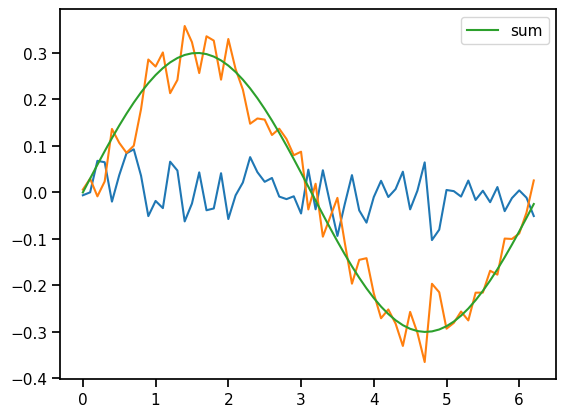

In [171]:
plt.plot(t, Y_approx2[1, :])
plt.plot(t, Y_approx[1, :])
plt.plot(t, Y_approx[1, :] + Y_approx2[1, :], label = "sum")
plt.legend()